In [11]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt

# Load model path into logic_ensemble object

In [52]:
model_path = '/home/spankaew/Git/astrologics/models/herault_hematopoiesis/'
model = le.LogicEnsemble(model_path, project_name = 'BonesisTutorial')
model.create_simulation()

Simulation object created


In [53]:
# setup initial state for the simulation
initial_state = {'Pax6':1}

# Calculate attractors from the model cohorts
In this part of the script, we calculate attractors from cohorts of model, and compared using clustermap

In [54]:
model.create_attractor()
model.attractor.get_attractors()
model.attractor.attractors_df

Attractor object created


100%|██████████| 88/88 [00:02<00:00, 37.43it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 1332.52it/s]

Attractors calculation completed


,bn45,bn8,bn12,bn65,bn42,bn60,bn70,bn28,bn63,bn73,bn87,bn58,bn74,bn11,bn30,bn16,bn3,bn41,bn32,bn85,bn82,bn53,bn62,bn4,bn39,bn64,bn27,bn61,bn7,bn14,bn57,bn20,bn18,bn54,bn25,bn24,bn67,bn38,bn29,bn72,bn50,bn31,bn5,bn49,bn35,bn37,bn0,bn81,bn83,bn79,bn80,bn75,bn9,bn46,bn26,bn10,bn13,bn21,bn36,bn23,bn44,bn33,bn86,bn34,bn55,bn40,bn84,bn2,bn6,bn59,bn52,bn77,bn47,bn17,bn68,bn76,bn1,bn56,bn71,bn51,bn19,bn48,bn43,bn69,bn78,bn66,bn22,bn15
000000000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
010100100011,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
001011101000,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0
101000110100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
001001101000,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,0,0,1


This shows that actually the two differences between the model 1 and two comes from the fact that you missed one value position when computing the attractor. I'll have to revise the script for doing this better.

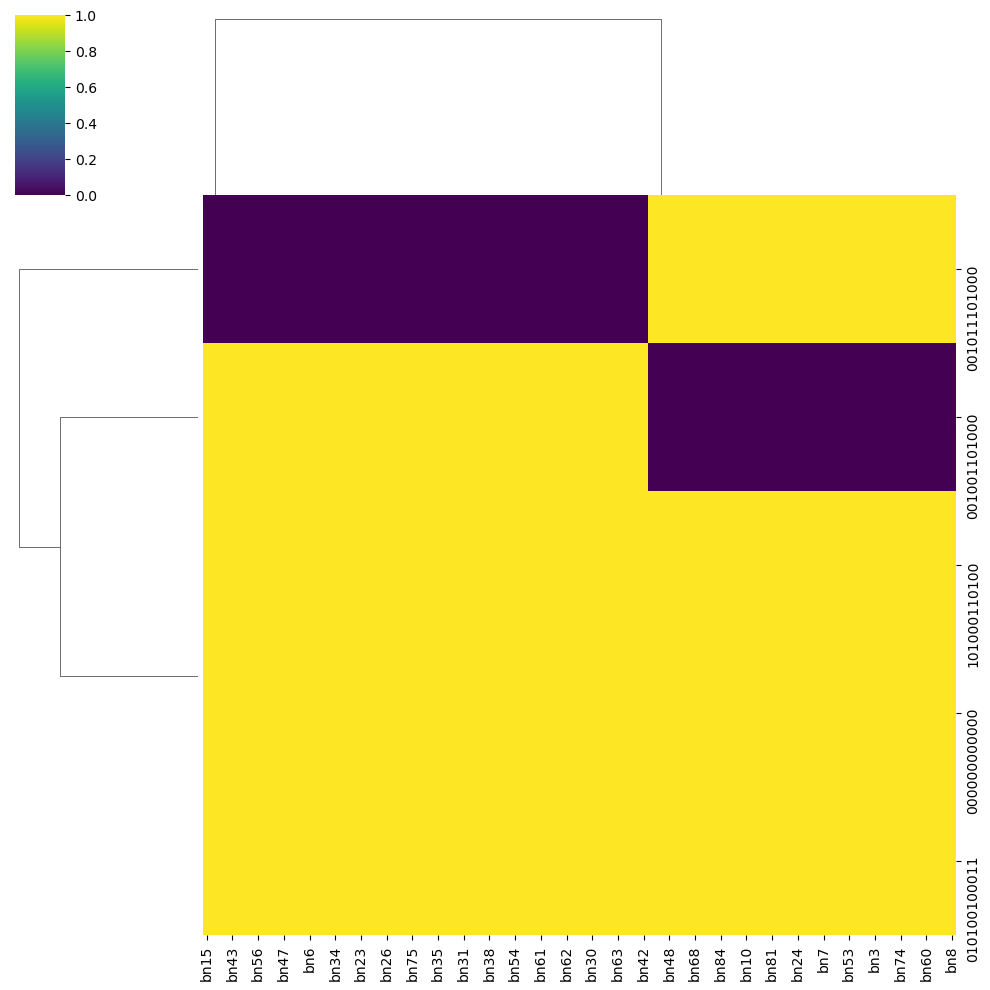

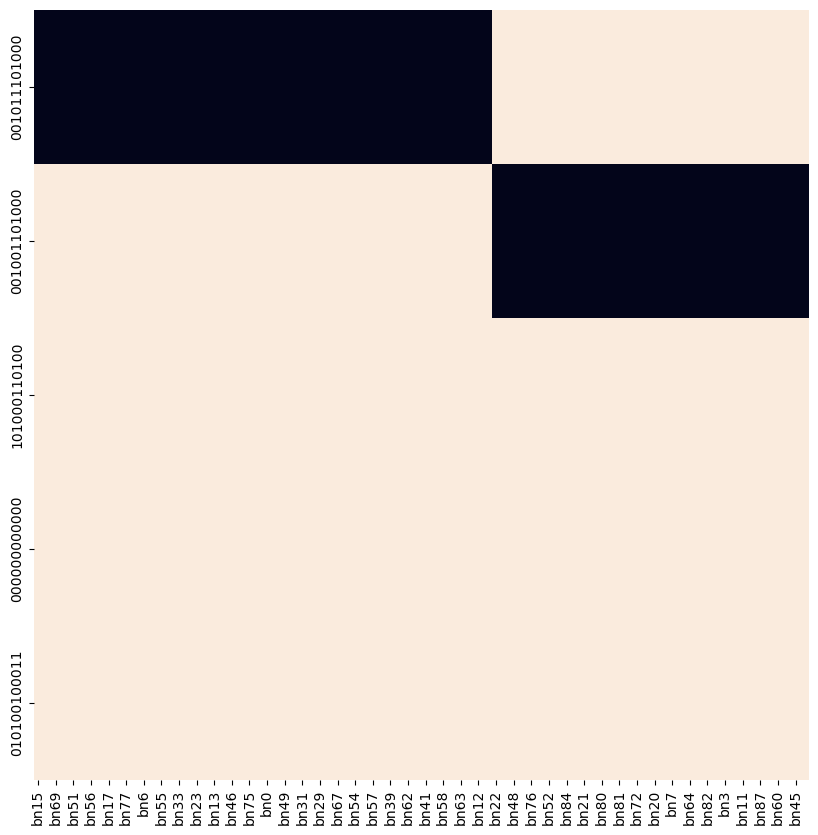

In [55]:
# Create the clustermap
clustermap = sns.clustermap(model.attractor.attractors_df, 
                            cmap='viridis', vmax=1, vmin=0, figsize=(10,10))

# Get the row and column order from the clustermap
row_order = clustermap.dendrogram_row.reordered_ind
col_order = clustermap.dendrogram_col.reordered_ind

# Reorder the dataframe
reordered_df = model.attractor.attractors_df.iloc[row_order, col_order]

# Plot the heatmap with the reordered dataframe without color bar
plt.figure(figsize=(10,10))
sns.heatmap(reordered_df, vmax=1, vmin=0, cbar=False)
#plt.savefig('/home/spankaew/Git/BooleanBenchmark/figures/BonesisTutorial_AttractorHeatmap.pdf')
plt.show()
plt.close()

From `logic_ensemble` object -> you can define simulation parameters and initial condition of the simulation directly. The simulation gives the node activity at each simulation time that is stored in the object called `.simulation.simulation_df`

In [ ]:
model.simulation.update_parameters(max_time = 20)
model.simulation.run_simulation(initial_state = initial_state)

Start simulation


100%|██████████| 88/88 [00:09<00:00,  9.09it/s]

Simulation completed


# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

Trajectory object created


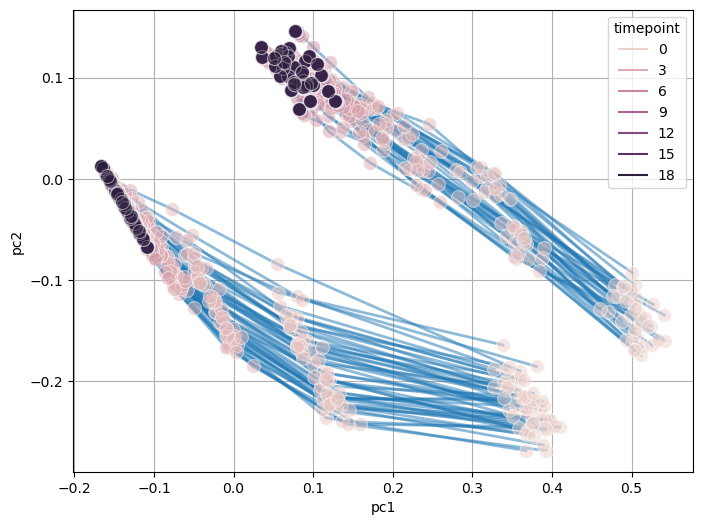

In [57]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend=True)

From the visualization, we can then try to group together models with simular simulation activity via clustering. 

In `logic_ensemble`, we utilize the package called `tslearn` - a toolkit to perform analysis on time series data. 

The timeseries clustering method included in this toolkit includes : 

- euclidean

- dynamic time warping (dtw) 

- softdtw.

The calculated clustering will be embeded into the trajectory matrix

100%|██████████| 19/19 [00:00<00:00, 23.56it/s]


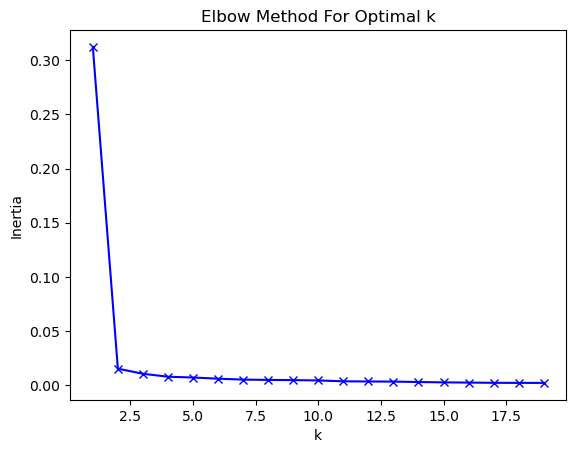

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tqdm import tqdm

pca_df = model.trajectory.pca_df
pca_df.model_id = pca_df.model_id.astype('category')
model_name = pca_df.model_id.cat.categories
model_pca_all = {}

for i in model_name:
    model_pca = pca_df.loc[pca_df.model_id == i,['pc1','pc2']].values
    model_pca_all[i] = np.array(model_pca)
pca_all_trajectory = np.array(list(model_pca_all.values()))

distortions = []
K = range(1, 20)  # Test k from 2 to 15

for k in tqdm(K):
    tsmodel = TimeSeriesKMeans(n_clusters=k, metric="euclidean", random_state=0)
    tsmodel.fit(pca_all_trajectory)
    distortions.append(tsmodel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Euclidean k-means
0.030 --> 0.015 --> 0.015 --> 


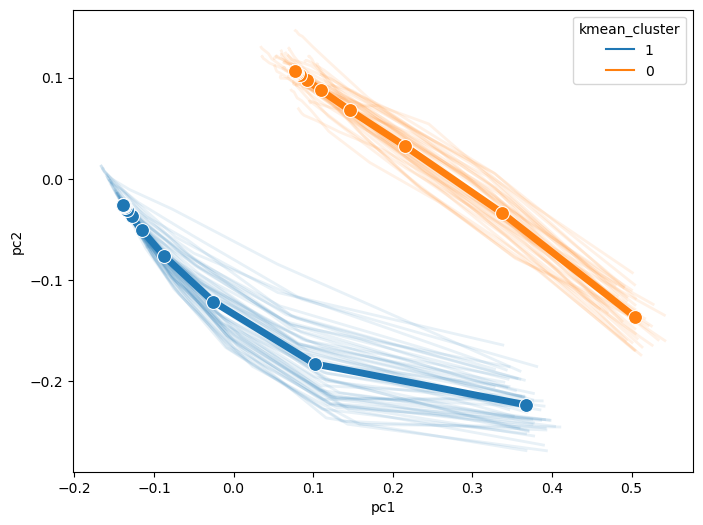

In [63]:
model.trajectory.calculate_kmean_cluster(n_cluster = 2)
model.trajectory.plot_trajectory_cluster()

# Okay, how about the networks that gives more sparse trajecotries ?

In [12]:
model_path = '/home/spankaew/Git/astrologics/models/herault_hematopoiesis/'
model = le.LogicEnsemble(model_path, project_name = 'BonesisTutorial')
model.create_simulation()

Simulation object created


In [13]:
traj_dir = '/home/spankaew/Git/astrologics/models/herault_hematopoiesis' 
traj_data = pd.read_csv('/home/spankaew/Git/astrologics/models/herault_hematopoiesis_traj_df.csv', index_col= 0)
initial_state = traj_data.loc['iHSC']
initial_state = initial_state.dropna().to_dict()

In [14]:
model.simulation.update_parameters(max_time = 30,thread_count = 15)
model.simulation.run_simulation(initial_state=initial_state)

Start simulation


  0%|          | 0/616 [00:00<?, ?it/s]

100%|██████████| 616/616 [00:51<00:00, 12.02it/s]

Simulation completed


# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

Trajectory object created


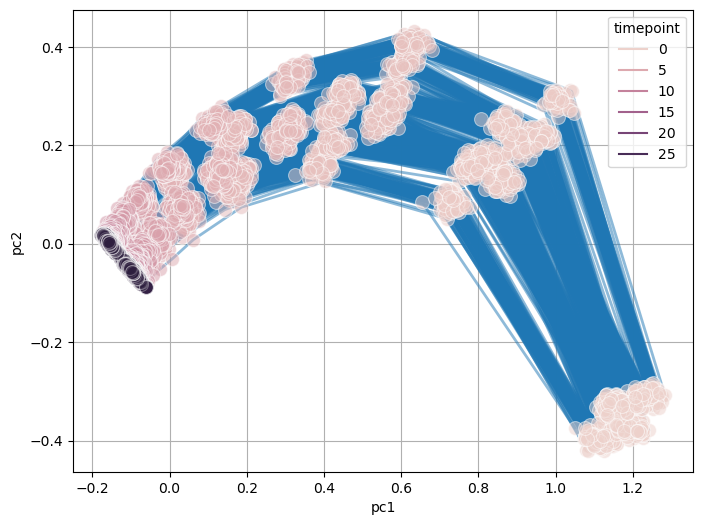

In [15]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_trajectory(color = 'timepoint', show_legend=True)

From the visualization, we can then try to group together models with simular simulation activity via clustering. 

In `logic_ensemble`, we utilize the package called `tslearn` - a toolkit to perform analysis on time series data. 

The timeseries clustering method included in this toolkit includes : 

- euclidean (default)

- dynamic time warping (dtw) 

- softdtw.

The calculated clustering will be embeded into the trajectory matrix

In [16]:
simulation_df = model.trajectory.simulation_df
n_components = 10
from sklearn.decomposition import PCA

# Initialize PCA (let's reduce to 2 principal components for this example)
pca = PCA(n_components=n_components)

# Fit and transform the data
df_pca = simulation_df.drop(['model_id','timepoint','kmean_cluster'], axis = 1) 
pca_result = pca.fit_transform(df_pca)

# Convert the result back to a DataFrame for easier interpretation
pca_df = pd.DataFrame(data=pca_result, index=df_pca.index)

# number pca column
number_list = list(range(pca_result.shape[1]))
str_list = [str(i+1) for i in number_list]
pca_df.columns = ['pc' + s for s in str_list]

# Add model_id and timepoint backinto dataframe
pca_df['model_id'] = simulation_df['model_id']
pca_df['timepoint'] = simulation_df['timepoint'].astype('float')


KeyError: "['kmean_cluster'] not found in axis"

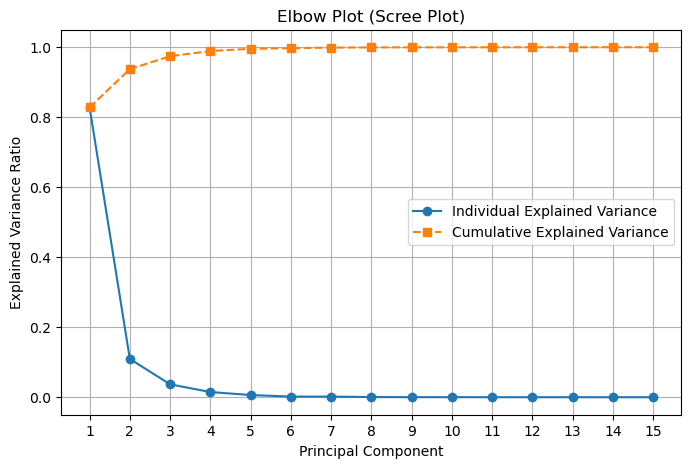

In [94]:
from sklearn.decomposition import PCA

pca = PCA()  # Fit all components by default
pca.fit(df_pca)  # X is your data matrix

explained_var_ratio = pca.explained_variance_ratio_

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained_var_ratio) + 1), explained_var_ratio, 'o-', label="Individual Explained Variance")
plt.plot(np.arange(1, len(explained_var_ratio) + 1), np.cumsum(explained_var_ratio), 's--', label="Cumulative Explained Variance")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot (Scree Plot)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(1, len(explained_var_ratio) + 1))
plt.show()


<Figure size 800x600 with 0 Axes>

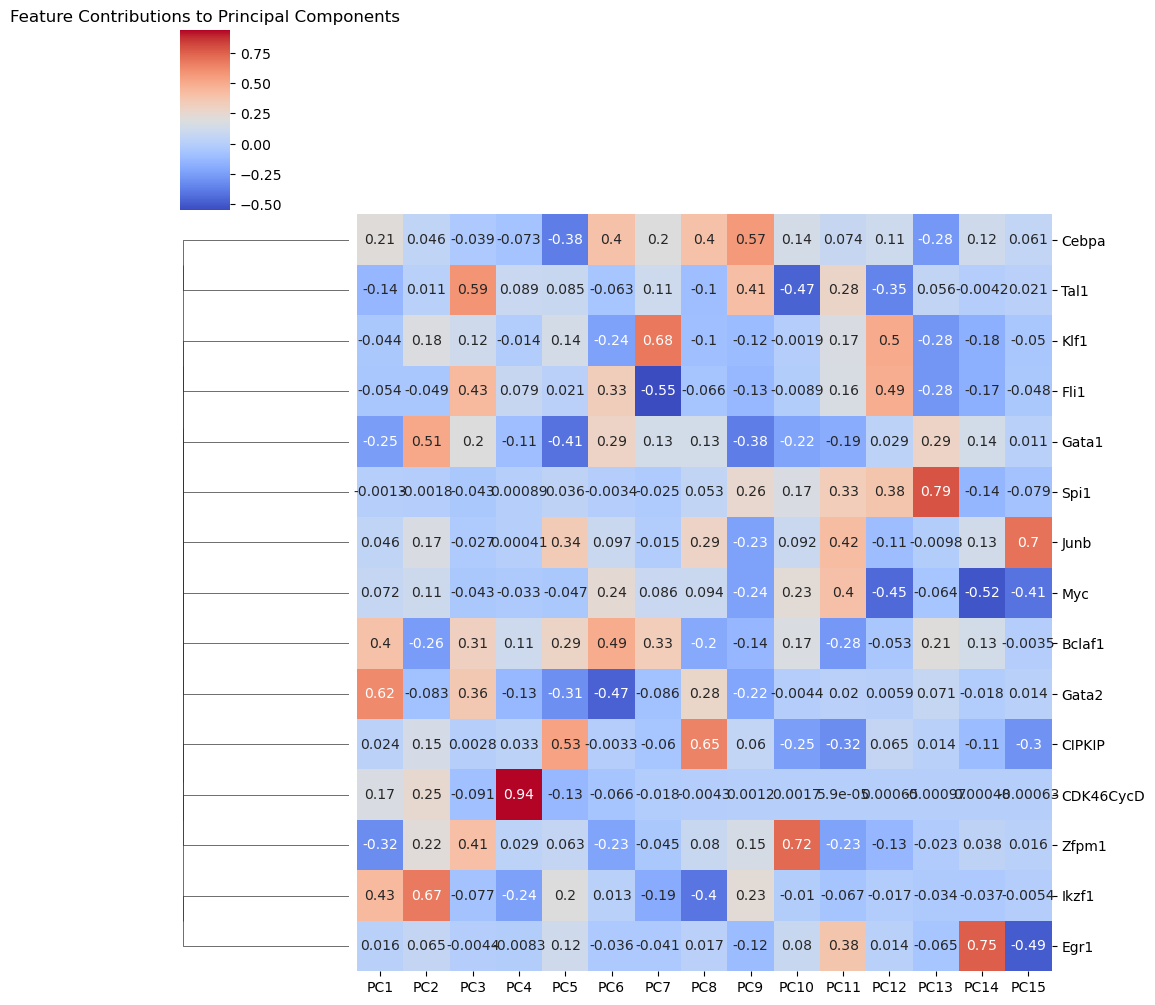

In [97]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

loadings = pca.components_.T

# Assuming feature names are available
features = list(df_pca.columns)

loading_df = pd.DataFrame(loadings, 
                          columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                          index=features)

plt.figure(figsize=(8,6))
sns.clustermap(loading_df, annot=True, cmap='coolwarm', row_cluster=True, col_cluster=False)
plt.title("Feature Contributions to Principal Components")
plt.show()

100%|██████████| 14/14 [01:29<00:00,  6.42s/it]


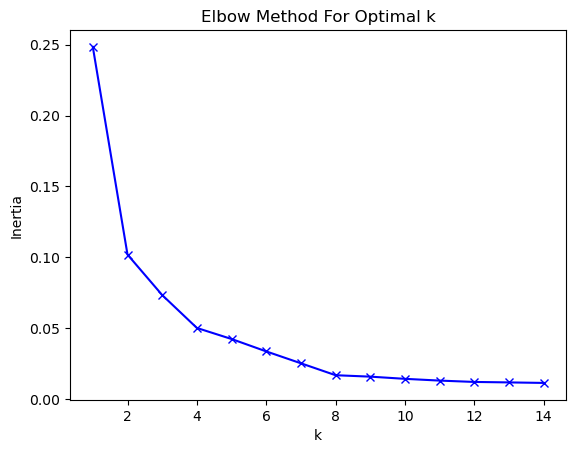

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tqdm import tqdm

pca_df = model.trajectory.pca_df
pca_df.model_id = pca_df.model_id.astype('category')
model_name = pca_df.model_id.cat.categories
model_pca_all = {}

for i in model_name:
    model_pca = pca_df.loc[pca_df.model_id == i,['pc1','pc2','pc3','pc4','pc5']].values
    model_pca_all[i] = np.array(model_pca)
pca_all_trajectory = np.array(list(model_pca_all.values()))

distortions = []
K = range(1, 15)  # Test k from 2 to 15

for k in tqdm(K):
    tsmodel = TimeSeriesKMeans(n_clusters=k, metric="dtw", random_state=0)
    tsmodel.fit(pca_all_trajectory)
    distortions.append(tsmodel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [103]:
simulation_df

,Myc,Bclaf1,CDK46CycD,Junb,CIPKIP,Gata2,Ikzf1,Spi1,Cebpa,Egr1,Gata1,Klf1,Fli1,Zfpm1,Tal1,model_id,timepoint,kmean_cluster
0,0.052029,0.639415,0.011330,0.011136,0.001982,0.808162,0.318024,0.003681,0.240059,0.001723,0.342781,0.016087,0.730831,0.398209,0.739567,bn168,0.0,2
1,0.099081,0.285229,0.057602,0.059808,0.024416,0.460145,0.484526,0.007291,0.251784,0.018937,0.701974,0.088433,0.619036,0.510606,0.654270,bn168,1.0,2
2,0.064069,0.154150,0.074922,0.075584,0.055802,0.239939,0.378036,0.008510,0.137207,0.031524,0.804700,0.139352,0.656358,0.690297,0.752802,bn168,2.0,2
3,0.035325,0.087937,0.055443,0.062180,0.059767,0.118853,0.239438,0.010740,0.064219,0.028126,0.826259,0.150953,0.683333,0.777313,0.796014,bn168,3.0,2
4,0.016236,0.048689,0.031796,0.043447,0.054920,0.061641,0.131218,0.011000,0.027918,0.020140,0.827464,0.143866,0.696340,0.810700,0.816879,bn168,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.001000,0.000000,0.890000,0.136000,0.754000,0.890000,0.890000,bn504,24.0,1
17860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.001000,0.000000,0.890000,0.136000,0.754000,0.890000,0.890000,bn504,25.0,1
17861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.001000,0.000000,0.890000,0.136000,0.754000,0.890000,0.890000,bn504,26.0,1
17862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.001000,0.000000,0.890000,0.136000,0.754000,0.890000,0.890000,bn504,27.0,1


In [17]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans

simulation_df = model.trajectory.simulation_df
simulation_df.model_id = simulation_df.model_id.astype('category')
node_list = model.trajectory.node_list

model_name = simulation_df.model_id.cat.categories

model_original_all = {}
for i in model_name:
    model_original = simulation_df.loc[simulation_df.model_id == i,node_list].values
    model_original_all[i] = np.array(model_original)
pca_all_trajectory = np.array(list(model_original_all.values()))

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=4, metric = 'euclidean', verbose=True, random_state=0)
y_pred = km.fit_predict(pca_all_trajectory)

Euclidean k-means
0.116 --> 0.067 --> 0.066 --> 0.066 --> 


Euclidean k-means
0.019 --> 0.011 --> 0.011 --> 


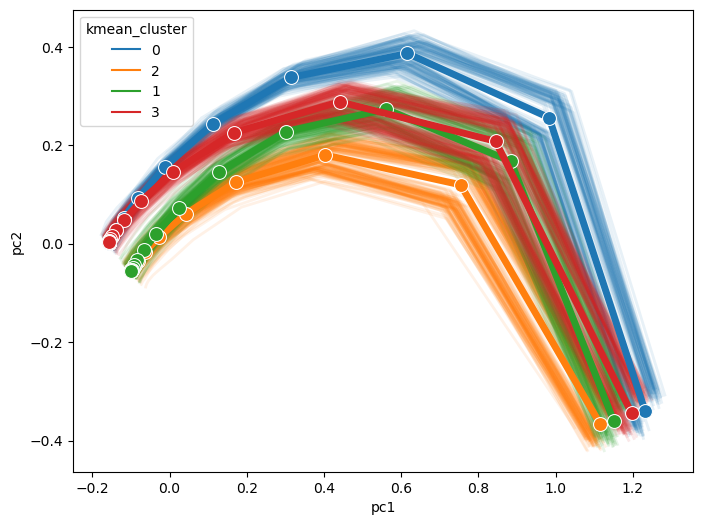

In [17]:
model.trajectory.calculate_kmean_cluster(n_cluster = 4, metric='euclidean', data = 'pca')
model.trajectory.plot_trajectory_cluster()

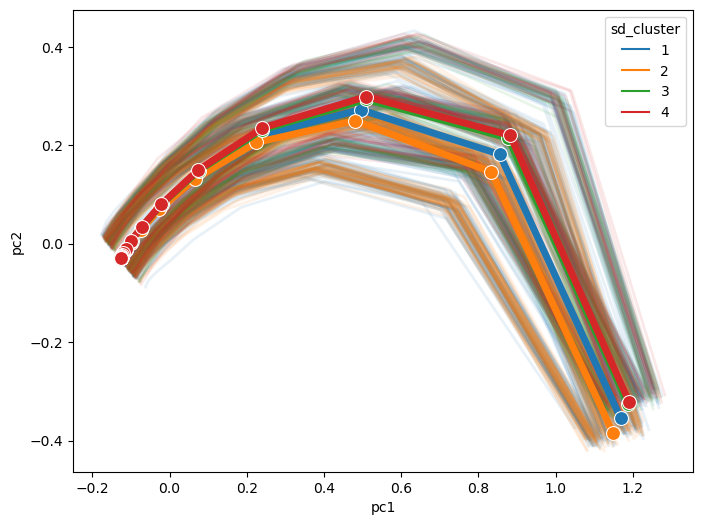

In [56]:
"""
Plot the calculated clusters onto the trajectory
"""
pca_df = model.trajectory.pca_df
sd_dict = sd_cluster['Cluster'].to_dict()
pca_df['sd_cluster'] = pca_df['model_id'].map(sd_dict)
fig_size = (8,6)

## Calculate the mean position
kmean_cluster = pca_df.groupby(['timepoint','sd_cluster'])[['pc1','pc2']].mean()

# Adjust figure size
plt.figure(figsize = fig_size)

## Plot with Seaborn
plot = sns.lineplot(data = pca_df, 
            x = 'pc1', y='pc2',
            hue = 'sd_cluster', units = 'model_id', estimator = None, lw=2, alpha = .1,
            sort = False, legend=False, palette='tab10')
plot2 = sns.lineplot(data = kmean_cluster, 
                    x = 'pc1',y='pc2',
                    hue = 'sd_cluster',
                    sort = False, marker = 'o', linewidth = 5, markersize = 10, palette='tab10')
plt.show()

In [ ]:
sd_cluster = pd.read_csv('/home/spankaew/Git/astrologics/SD_cluster_hematopoiesis.csv', index_col= 0)

Index(['bn168', 'bn602', 'bn157', 'bn45', 'bn8', 'bn109', 'bn307', 'bn12',
       'bn530', 'bn321',
       ...
       'bn126', 'bn66', 'bn310', 'bn22', 'bn217', 'bn15', 'bn200', 'bn356',
       'bn364', 'bn504'],
      dtype='object', length=616)

In [47]:
unique_values_df = model.trajectory.pca_df[['model_id', 'kmean_cluster']].drop_duplicates()
unique_values_df.set_index('model_id',inplace=True)

test = pd.concat([unique_values_df, sd_cluster], axis=1, ignore_index=True)

test.columns = ['kmean_cluster', 'sd_cluster']

count_matrix = test.groupby(['kmean_cluster', 'sd_cluster']).size().unstack(fill_value=0)
count_matrix

sd_cluster,1,2,3,4
kmean_cluster,,,,
0,60,30,15,15
2,88,44,22,22
1,80,40,20,20
3,80,40,20,20


In [9]:
model_mtx = model.simulation.simulation_df
cluster_dict = model.trajectory.cluster_dict
model_mtx['kmean_cluster'] = model_mtx['model_id']
model_mtx['kmean_cluster'] = model_mtx['kmean_cluster'].replace(cluster_dict)

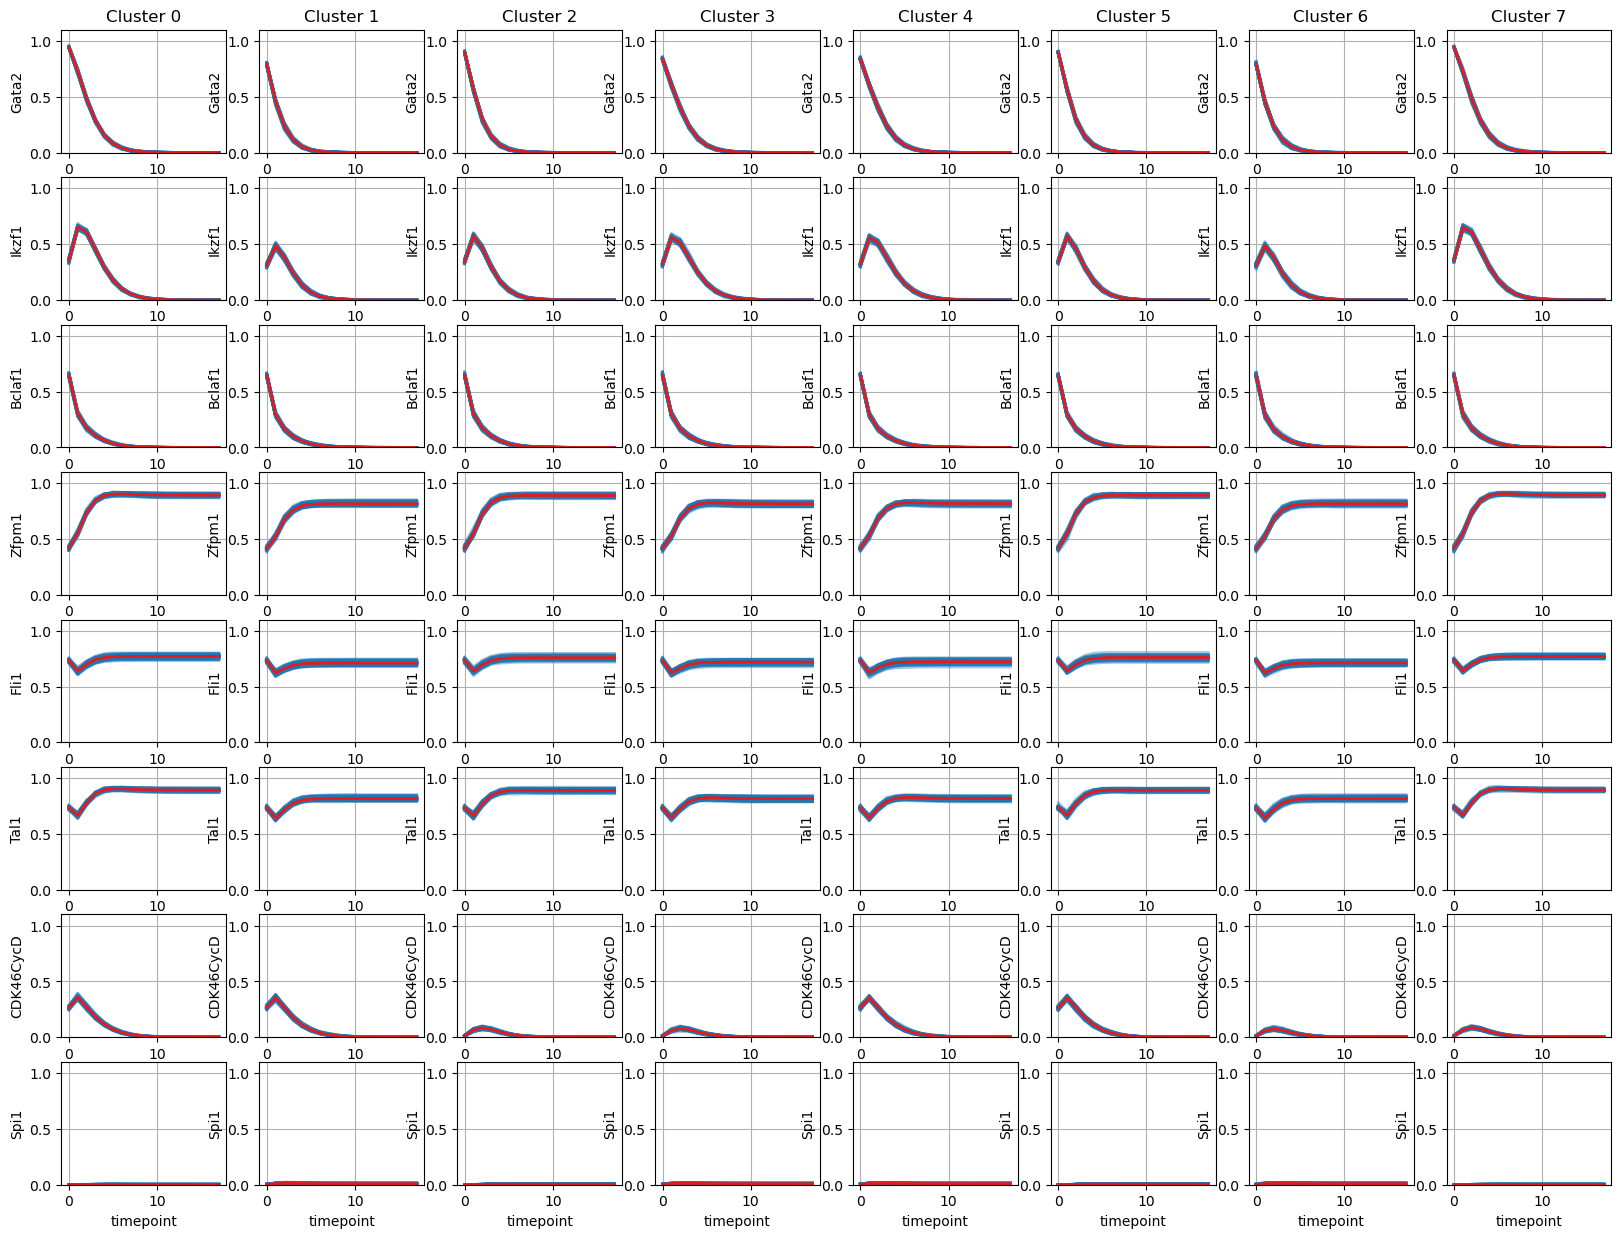

In [10]:

# Setup the gene list
selected_genes = ['Gata2','Ikzf1','Bclaf1','Zfpm1','Fli1','Tal1','CDK46CycD','Spi1']

num_timesteps = 18

# Function to create matrix for each condition
def create_vis_matrix(cluster_num):
    vis = model_mtx.loc[model_mtx['kmean_cluster'] == cluster_num]
    vis = vis[selected_genes + ['timepoint', 'model_id']]
    vis = vis[vis.timepoint.isin(range(0, num_timesteps))]
    vis['cluster'] = str(cluster_num)
    return vis

# Create matrices for each condition
vis_matrices = [create_vis_matrix(i) for i in range(8)]

# Plot with Seaborn
plt.figure(figsize=(20, 15))
n_genes = len(selected_genes)

for i, gene in enumerate(selected_genes):
    for j, vis in enumerate(vis_matrices):
        plt.subplot(n_genes, 8, 8 * i + j + 1)
        plot = sns.lineplot(data=vis, x='timepoint', y=gene, lw=2, hue='cluster', units = 'model_id', estimator = None, alpha = 0.4)
        plot.set_ylim(0, 1.1)
        plot.set_ylabel(gene)
        plot.grid(True)
        plot.legend().remove()
        if i == 0:
            plot.set_title(f'Cluster {j}')

for i, gene in enumerate(selected_genes):
    for j, vis in enumerate(vis_matrices):
        plt.subplot(n_genes, 8,8 * i + j + 1)
        plot = sns.lineplot(data=vis, x='timepoint', y=gene, lw=2, hue='cluster', palette='Set1')
        plot.set_ylim(0, 1.1)
        plot.set_ylabel(gene)
        plot.grid(True)
        plot.legend().remove()
        if i == 0:
            plot.set_title(f'Cluster {j}')

#plt.tight_layout()
plt.show()
plt.close()

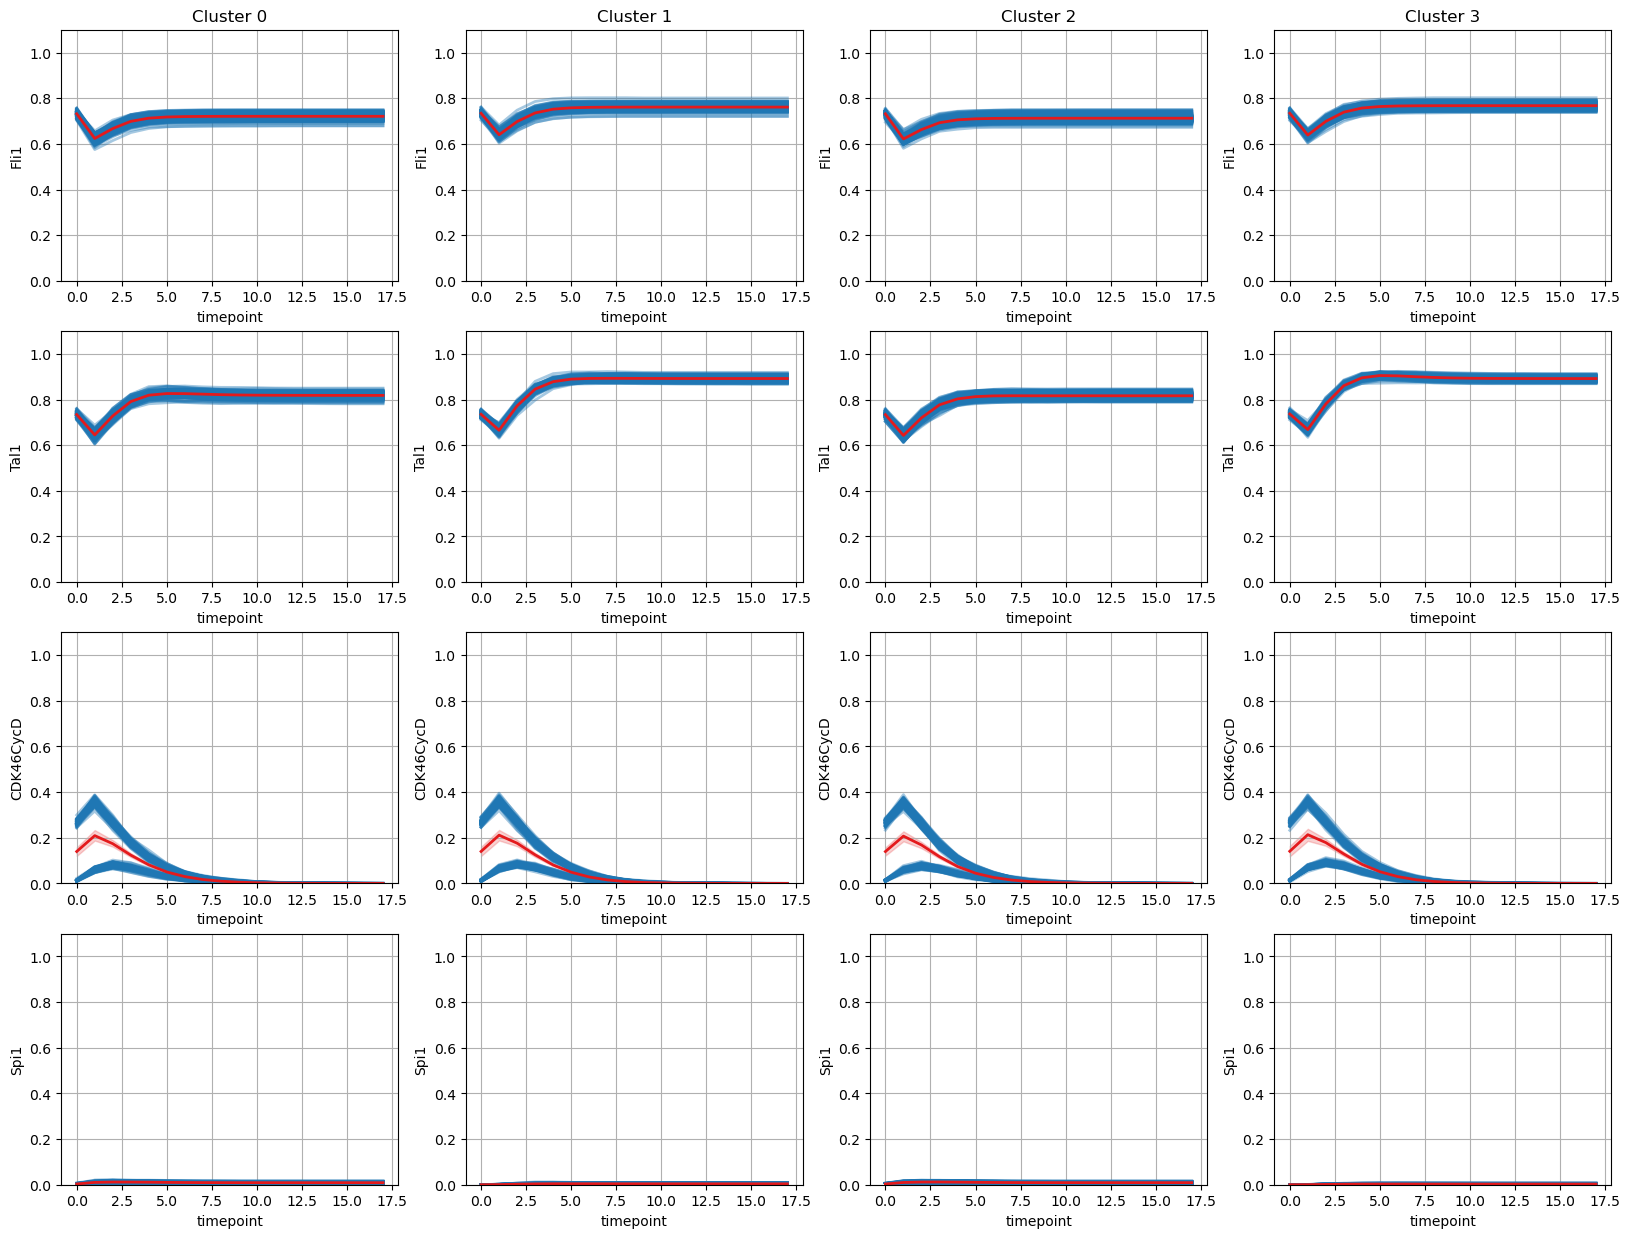

In [100]:

# Setup the gene list
selected_genes = ['Fli1','Tal1','CDK46CycD','Spi1']
num_timesteps = 18

# Function to create matrix for each condition
def create_vis_matrix(cluster_num):
    vis = model_mtx.loc[model_mtx['kmean_cluster'] == cluster_num]
    vis = vis[selected_genes + ['timepoint', 'model_id']]
    vis = vis[vis.timepoint.isin(range(0, num_timesteps))]
    vis['cluster'] = str(cluster_num)
    return vis

# Create matrices for each condition
vis_matrices = [create_vis_matrix(i) for i in range(4)]

# Plot with Seaborn
plt.figure(figsize=(20, 15))
n_genes = len(selected_genes)

for i, gene in enumerate(selected_genes):
    for j, vis in enumerate(vis_matrices):
        plt.subplot(n_genes, 4, 4 * i + j + 1)
        plot = sns.lineplot(data=vis, x='timepoint', y=gene, lw=2, hue='cluster', units = 'model_id', estimator = None, alpha = 0.4)
        plot.set_ylim(0, 1.1)
        plot.set_ylabel(gene)
        plot.grid(True)
        plot.legend().remove()
        if i == 0:
            plot.set_title(f'Cluster {j}')

for i, gene in enumerate(selected_genes):
    for j, vis in enumerate(vis_matrices):
        plt.subplot(n_genes, 4,4 * i + j + 1)
        plot = sns.lineplot(data=vis, x='timepoint', y=gene, lw=2, hue='cluster', palette='Set1')
        plot.set_ylim(0, 1.1)
        plot.set_ylabel(gene)
        plot.grid(True)
        plot.legend().remove()
        if i == 0:
            plot.set_title(f'Cluster {j}')

#plt.tight_layout()
plt.show()
plt.close()